In [ ]:
import zipfile
import os
import cv2
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# zip_ref = zipfile.ZipFile('/tmp/archive.zip', 'r') #Opens the zip file in read mode
#####----------------------

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Csulb/Spring 2022 (Last Semester!)/CECS 456 Machine Learning/CECS456_Project/archive.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/content') #Extracts the files into the /tmp folder
zip_ref.close()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
len(os.listdir('/content/raw-img/'))

12

In [ ]:
print("dogs",len(os.listdir('/content/raw-img/cane')))
print("horse",len(os.listdir('/content/raw-img/cavallo')))
print("elefant",len(os.listdir('/content/raw-img/elefante')))
print("butterfly",len(os.listdir('/content/raw-img/farfalla')))
print("chicken",len(os.listdir('/content/raw-img/gallina')))
print("cat",len(os.listdir('/content/raw-img/gatto')))
print("cow",len(os.listdir('/content/raw-img/mucca')))
print("sheep",len(os.listdir('/content/raw-img/pecora')))
print("spider",len(os.listdir('/content/raw-img/ragno')))
print("squirrel",len(os.listdir('/content/raw-img/scoiattolo')))

dogs 4863
horse 2623
elefant 1446
butterfly 2112
chicken 3098
cat 1668
cow 1866
sheep 1820
spider 4821
squirrel 1862


In [ ]:
import tensorflow as tf
from tensorflow import keras
import sklearn
import numpy as np
np.random.seed(42)
import matplotlib as mpl
import matplotlib.pyplot as plt
import random

#Splitting into train and test
import shutil

rootdir= '/content/raw-img' #path of the original folder

classes = ['cane', 'cavallo', 'elefante','farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']

In [ ]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          


# for cl in classes:
#     path = os.path.join(rootdir, cl)
#     for im_path in os.listdir(path):
#         img = cv2.imread(os.path.join(path, im_path))
#         plt.imshow(img)
#         break
#     break

for i in classes:
  os.makedirs(rootdir +'/train/' + i)
  os.makedirs(rootdir +'/test/' + i)

  source = rootdir + '/' + i
  allFileNames = os.listdir(source)

  np.random.shuffle(allFileNames)

  test_ratio = 0.25

  train_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                      [int(len(allFileNames)* (1 - test_ratio))])

  train_FileNames = [source+'/'+ name for name in train_FileNames.tolist()]
  test_FileNames = [source+'/' + name for name in test_FileNames.tolist()]

  for name in train_FileNames:
    shutil.copy(name, rootdir +'/train/' + i)

  for name in test_FileNames:
    shutil.copy(name, rootdir +'/test/' + i)

FileExistsError: ignored

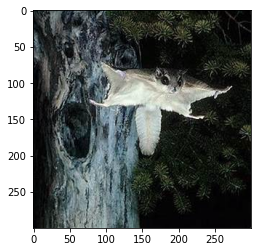

In [ ]:

#add to train 
allTrain = []


count = 0
for i in classes:
  rootdir= '/content/raw-img/train'
  source = rootdir + '/' + i
  allFileNames = os.listdir(source)
  # print(len(allFileNames))
  for name in allFileNames:
    try:
        img = cv2.imread(os.path.join(source, name))
        # print(os.path.join(source, name))
        resized_img = cv2.resize(img, (224,224))
        #X_train_full.append(resized_img)
        allTrain.append([resized_img,count])
        plt.imshow(img)
    except Exception as e:
        pass
    #y_train_full.append(i)
  count += 1

# X_test = []
# y_test = []
allTest = []
#add to test
count = 0
for i in classes:
  rootdir= '/content/raw-img/test'
  source = rootdir + '/' + i
  allFileNames = os.listdir(source)

  for name in allFileNames:
    try:
        img = cv2.imread(os.path.join(source, name))
        resized_img = cv2.resize(img, (224,224))
        # X_test.append(resized_img)
        allTest.append([resized_img,count])
        # plt.imshow(img)
    except Exception as e:
        pass
    # y_test.append(i)
  count += 1

In [ ]:
random.shuffle(allTrain)
X_train_full = []
y_train_full = []

print(allTrain[0])
for x, y in allTrain:
  X_train_full.append(x)
  y_train_full.append(y)

random.shuffle(allTest)
X_test = []
y_test = []

for x,y in allTest:
  X_test.append(x)
  y_test.append(y)

[array([[[100, 113, 127],
        [ 28,  38,  51],
        [ 50,  64,  78],
        ...,
        [ 12,   3,   0],
        [ 12,   3,   0],
        [ 13,   4,   0]],

       [[ 80,  93, 107],
        [ 37,  48,  62],
        [ 21,  37,  50],
        ...,
        [ 12,   3,   0],
        [ 12,   3,   0],
        [ 13,   4,   0]],

       [[ 73,  86, 100],
        [ 47,  59,  73],
        [  4,  15,  30],
        ...,
        [ 11,   3,   0],
        [ 12,   4,   0],
        [ 12,   4,   0]],

       ...,

       [[ 51,  67,  78],
        [ 61,  78,  90],
        [ 48,  65,  78],
        ...,
        [ 84, 100, 117],
        [ 58,  73,  90],
        [ 37,  50,  66]],

       [[ 63,  81,  95],
        [ 58,  76,  89],
        [ 39,  56,  70],
        ...,
        [ 79,  95, 112],
        [ 61,  76,  93],
        [ 40,  54,  70]],

       [[ 64,  83,  98],
        [ 61,  80,  95],
        [ 38,  56,  69],
        ...,
        [ 70,  86, 103],
        [ 68,  83, 100],
        [ 49,  64,  80]

In [ ]:
# import random


for i in y_train_full[:10]:
    print(i)
print(len(X_train_full))
#print(X_train_full[0])


5
0
4
3
4
4
1
1
8
3
19631


In [ ]:
X_train_full = np.array(X_train_full).reshape(-1, 224,224, 3)

In [ ]:
y_train_full = np.array(y_train_full)

In [ ]:
X_test = np.array(X_test).reshape(-1, 224,224, 3)
y_test = np.array(y_test)

In [ ]:
print(type(X_train_full),X_train_full.shape)
print(type(y_train_full),y_train_full.shape)

<class 'numpy.ndarray'> (19631, 224, 224, 3)
<class 'numpy.ndarray'> (19631,)


In [ ]:

# datagen = keras.preprocessing.image.ImageDataGenerator()
# # load and iterate training dataset
# train_it = datagen.flow_from_directory('raw-img/train', class_mode='binary', batch_size=5000)
# # load and iterate validation dataset
# #val_it = datagen.flow_from_directory('data/validation/', class_mode='binary', batch_size=64)
# # load and iterate test dataset
# test_it = datagen.flow_from_directory('raw-img/test', class_mode='binary', batch_size=5000)

In [ ]:
# X_train_full = np.array(X_train_full)#changeg first
# y_train_full = np.array(y_train_full)
# X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
# y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]
# X_test = X_test

# X_train, X_valid = train_it[:-5000], X_train_full[-5000:] #take last 5000 elements for validation (slicing)
# y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:] #^  
# X_test = X_test

In [ ]:
# batchX, batchy = train_it.next()
# print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

In [ ]:
# X_test[:3]
# for index, image in enumerate(X_new):
#     plt.subplot(1, 3, index + 1)
#     plt.imshow(image, cmap="binary", interpolation="nearest")
#     plt.axis('off')
#   plt.subplots_adjust(wspace=0.2, hspace=0.5)
#   plt.show()

In [ ]:
X_train, X_valid = X_train_full[:-3000], X_train_full[-3000:] #take last 5000 elements for validation (slicing)
y_train, y_valid = y_train_full[:-3000], y_train_full[-3000:] #^  
X_test = X_test


In [ ]:
X_train_full.shape

(19631, 224, 224, 3)

In [ ]:
y_train

array([5, 0, 4, ..., 7, 0, 2])

In [ ]:
X_train_full[0]

array([[[100, 113, 127],
        [ 28,  38,  51],
        [ 50,  64,  78],
        ...,
        [ 12,   3,   0],
        [ 12,   3,   0],
        [ 13,   4,   0]],

       [[ 80,  93, 107],
        [ 37,  48,  62],
        [ 21,  37,  50],
        ...,
        [ 12,   3,   0],
        [ 12,   3,   0],
        [ 13,   4,   0]],

       [[ 73,  86, 100],
        [ 47,  59,  73],
        [  4,  15,  30],
        ...,
        [ 11,   3,   0],
        [ 12,   4,   0],
        [ 12,   4,   0]],

       ...,

       [[ 51,  67,  78],
        [ 61,  78,  90],
        [ 48,  65,  78],
        ...,
        [ 84, 100, 117],
        [ 58,  73,  90],
        [ 37,  50,  66]],

       [[ 63,  81,  95],
        [ 58,  76,  89],
        [ 39,  56,  70],
        ...,
        [ 79,  95, 112],
        [ 61,  76,  93],
        [ 40,  54,  70]],

       [[ 64,  83,  98],
        [ 61,  80,  95],
        [ 38,  56,  69],
        ...,
        [ 70,  86, 103],
        [ 68,  83, 100],
        [ 49,  64,  80]]

In [ ]:
# cnn = tf.keras.models.Sequential() #initializing the CNN
# cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding = "same", input_shape=(224, 224, 3))) #Convolution 1
# cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", padding = "same"))
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2))) #Pooling 1
# cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding = "same")) #Convolution 2
# cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation="relu", padding = "same")) #Convolution 3
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2))) #Pooling 2
# cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation="relu", padding = "same")) #Convolution 4
# cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation="relu", padding = "same")) #Convolution 5
# cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation="relu", padding = "same")) 
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2))) #Pooling 3
# cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation="relu", padding = "same")) 
# cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation="relu", padding = "same")) 
# cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation="relu", padding = "same")) 
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2))) #Pool
# cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation="relu", padding = "same")) 
# cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation="relu", padding = "same")) 
# cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=(3,3), activation="relu", padding = "same")) 
# cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2)))
# cnn.add(tf.keras.layers.Flatten()) #Flaterning
# cnn.add(tf.keras.layers.Dense(units=4096, activation="relu"))#Full Connection1
# #tf.keras.layers.Dropout(0.5)
# cnn.add(tf.keras.layers.Dense(units=4096, activation="relu"))#Full Connection2
# #tf.keras.layers.Dropout(0.5)
# #cnn.add(tf.keras.layers.Dense(units= 1000, activation= "relu"))
# #tf.keras.layers.Dropout(0.5)
# cnn.add(tf.keras.layers.Dense(units= 10, activation= "softmax"))#Output layer

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dense, Dropout
from keras.layers.merge import concatenate

In [ ]:
def Inception_block(input_layer, f1, f2_conv1, f2_conv3, f3_conv1, f3_conv5, f4): 
  # Input: 
  # - f1: number of filters of the 1x1 convolutional layer in the first path
  # - f2_conv1, f2_conv3 are number of filters corresponding to the 1x1 and 3x3 convolutional layers in the second path
  # - f3_conv1, f3_conv5 are the number of filters corresponding to the 1x1 and 5x5  convolutional layer in the third path
  # - f4: number of filters of the 1x1 convolutional layer in the fourth path

  # 1st path:
  path1 = Conv2D(filters=f1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)

  # 2nd path
  path2 = Conv2D(filters = f2_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
  path2 = Conv2D(filters = f2_conv3, kernel_size = (3,3), padding = 'same', activation = 'relu')(path2)

  # 3rd path
  path3 = Conv2D(filters = f3_conv1, kernel_size = (1,1), padding = 'same', activation = 'relu')(input_layer)
  path3 = Conv2D(filters = f3_conv5, kernel_size = (5,5), padding = 'same', activation = 'relu')(path3)

  # 4th path
  path4 = MaxPooling2D((3,3), strides= (1,1), padding = 'same')(input_layer)
  path4 = Conv2D(filters = f4, kernel_size = (1,1), padding = 'same', activation = 'relu')(path4)

  output_layer = concatenate([path1, path2, path3, path4], axis = -1)

  return output_layer

In [ ]:
def GoogLeNet():
  # input layer 
  input_layer = Input(shape = (224, 224, 3))

  # convolutional layer: filters = 64, kernel_size = (7,7), strides = 2
  X = Conv2D(filters = 64, kernel_size = (7,7), strides = 2, padding = 'valid', activation = 'relu')(input_layer)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

  # convolutional layer: filters = 64, strides = 1
  X = Conv2D(filters = 64, kernel_size = (1,1), strides = 1, padding = 'same', activation = 'relu')(X)

  # convolutional layer: filters = 192, kernel_size = (3,3)
  X = Conv2D(filters = 192, kernel_size = (3,3), padding = 'same', activation = 'relu')(X)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

  # 1st Inception block
  X = Inception_block(X, f1 = 64, f2_conv1 = 96, f2_conv3 = 128, f3_conv1 = 16, f3_conv5 = 32, f4 = 32)

  # 2nd Inception block
  X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 192, f3_conv1 = 32, f3_conv5 = 96, f4 = 64)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size= (3,3), strides = 2)(X)

  # 3rd Inception block
  X = Inception_block(X, f1 = 192, f2_conv1 = 96, f2_conv3 = 208, f3_conv1 = 16, f3_conv5 = 48, f4 = 64)

  # Extra network 1:
  X1 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
  X1 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X1)
  X1 = Flatten()(X1)
  X1 = Dense(1024, activation = 'relu')(X1)
  X1 = Dropout(0.7)(X1)
  X1 = Dense(10, activation = 'softmax')(X1)

  
  # 4th Inception block
  X = Inception_block(X, f1 = 160, f2_conv1 = 112, f2_conv3 = 224, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

  # 5th Inception block
  X = Inception_block(X, f1 = 128, f2_conv1 = 128, f2_conv3 = 256, f3_conv1 = 24, f3_conv5 = 64, f4 = 64)

  # 6th Inception block
  X = Inception_block(X, f1 = 112, f2_conv1 = 144, f2_conv3 = 288, f3_conv1 = 32, f3_conv5 = 64, f4 = 64)

  # Extra network 2:
  X2 = AveragePooling2D(pool_size = (5,5), strides = 3)(X)
  X2 = Conv2D(filters = 128, kernel_size = (1,1), padding = 'same', activation = 'relu')(X2)
  X2 = Flatten()(X2)
  X2 = Dense(1024, activation = 'relu')(X2)
  X2 = Dropout(0.7)(X2)
  X2 = Dense(10, activation = 'softmax')(X2)
  
  
  # 7th Inception block
  X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, 
                      f3_conv5 = 128, f4 = 128)

  # max-pooling layer: pool_size = (3,3), strides = 2
  X = MaxPooling2D(pool_size = (3,3), strides = 2)(X)

  # 8th Inception block
  X = Inception_block(X, f1 = 256, f2_conv1 = 160, f2_conv3 = 320, f3_conv1 = 32, f3_conv5 = 128, f4 = 128)

  # 9th Inception block
  X = Inception_block(X, f1 = 384, f2_conv1 = 192, f2_conv3 = 384, f3_conv1 = 48, f3_conv5 = 128, f4 = 128)

  # Global Average pooling layer 
  X = GlobalAveragePooling2D(name = 'GAPL')(X)

  # Dropoutlayer 
  X = Dropout(0.4)(X)

  # output layer 
  X = Dense(10, activation = 'softmax')(X)
  
  # model
  model = Model(input_layer, [X, X1, X2], name = 'GoogLeNet')

  return model

In [ ]:
cnn = GoogLeNet()

In [ ]:
cnn.summary()

Model: "GoogLeNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 109, 109, 64  9472        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 54, 54, 64)   0           ['conv2d[0][0]']                 
                                                                                          

In [ ]:
cnn.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
# from tensorflow.keras.optimizers import Adam
# opt = Adam(lr=0.001)
# cnn.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
#cnn.compile(loss='sparse_categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
            # loss_weights=[1, 0.3, 0.3], 
           

In [ ]:
# from keras.callbacks import ModelCheckpoint, EarlyStopping
# checkpoint = ModelCheckpoint("", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
# early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')

In [ ]:
# def generator(X_data, y_data, batch_size):

#   samples_per_epoch = X_data.shape[0]
#   number_of_batches = samples_per_epoch/batch_size
#   counter=0

#   while 1:

#     X_batch = np.array(X_data[batch_size*counter:batch_size*(counter+1)]).astype('float32')
#     y_batch = np.array(y_data[batch_size*counter:batch_size*(counter+1)]).astype('float32')
#     counter += 1
#     yield X_batch,y_batch

#     #restart counter to yeild data in the next epoch as well
#     if counter >= number_of_batches:
#         counter = 0

In [39]:
#history = cnn.fit(X_train, y_train, batch_size = 100, epochs=30, validation_data=(X_valid, y_valid)) #try 100 epochs? less than 10 is too small
history = cnn.fit(X_train, y_train, batch_size = 100, epochs=30, validation_data=(X_valid, y_valid)) #try 100 epochs? less than 10 is too small
# history = cnn.fit_generator(steps_per_epoch=100,generator=(X_train,y_train), validation_data= (X_valid,y_valid), validation_steps=10,epochs=100,callbacks=[checkpoint,early])
# history = cnn.fit_generator(generator=generator(X_train,y_train,100), steps_per_epoch=len(X_train) // 100, epochs=50,
#   verbose = 1,
#   callbacks = [checkpoint,early], 
#   validation_data = generator(X_valid,y_valid,                                                                             100*2))

Epoch 1/30
167/167 [==============================] - 61s 305ms/step - loss: 6.7418 - dense_4_loss: 2.2184 - dense_1_loss: 2.2969 - dense_3_loss: 2.2264 - dense_4_accuracy: 0.1901 - dense_1_accuracy: 0.1991 - dense_3_accuracy: 0.1962 - val_loss: 6.2599 - val_dense_4_loss: 2.0931 - val_dense_1_loss: 2.1027 - val_dense_3_loss: 2.0641 - val_dense_4_accuracy: 0.2413 - val_dense_1_accuracy: 0.2733 - val_dense_3_accuracy: 0.2673
Epoch 2/30
167/167 [==============================] - 50s 297ms/step - loss: 6.4279 - dense_4_loss: 2.1496 - dense_1_loss: 2.1347 - dense_3_loss: 2.1436 - dense_4_accuracy: 0.2188 - dense_1_accuracy: 0.2316 - dense_3_accuracy: 0.2276 - val_loss: 6.4494 - val_dense_4_loss: 2.1188 - val_dense_1_loss: 2.1955 - val_dense_3_loss: 2.1350 - val_dense_4_accuracy: 0.2197 - val_dense_1_accuracy: 0.2243 - val_dense_3_accuracy: 0.2170
Epoch 3/30
167/167 [==============================] - 51s 307ms/step - loss: 5.8815 - dense_4_loss: 1.9976 - dense_1_loss: 1.9221 - dense_3_loss: 

# **Evaluation**

In [40]:
score = cnn.evaluate(X_test, y_test)

205/205 [==============================] - 10s 42ms/step - loss: 4.8590 - dense_4_loss: 1.6350 - dense_1_loss: 1.5427 - dense_3_loss: 1.6812 - dense_4_accuracy: 0.6915 - dense_1_accuracy: 0.6978 - dense_3_accuracy: 0.6952


In [ ]:
print('Total loss on Testing Set:', score[0])

In [42]:
print('Accuracy of Testing Set:', score[6])

Accuracy of Testing Set: 0.6951740980148315


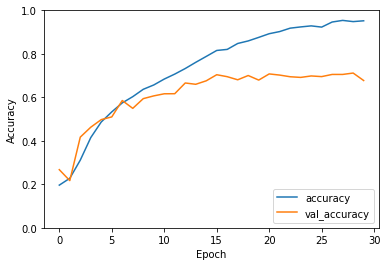

In [55]:
plt.plot(history.history['dense_3_accuracy'], label='accuracy')
plt.plot(history.history['val_dense_3_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

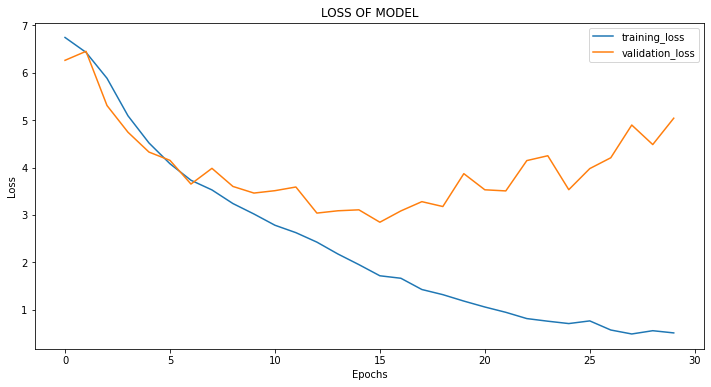

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("LOSS OF MODEL")
plt.legend(['training_loss', 'validation_loss'])
plt.show()

In [45]:
X_new = X_test[:3]
y_proba = cnn.predict(X_new)
y_proba[0].round(2)
#y_proba

array([[0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.04, 0.91, 0.  , 0.02, 0.02, 0.  , 0.01, 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_proba[1].round(2)

In [47]:
y_proba[2].round(2)

array([[0.79, 0.21, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.04, 0.95, 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [48]:
y_pred = np.argmax(cnn.predict(X_new), axis=-1)
y_pred

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]])

In [49]:
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel", "dog": "cane", "cavallo": "horse", "elephant" : "elefante", "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto", "cow": "mucca", "ragno": "spider", "spider": "ragno", "squirrel": "scoiattolo"}

In [50]:
np.array(classes)[y_pred]

array([['cane', 'cavallo', 'cane'],
       ['cane', 'cavallo', 'cane'],
       ['cane', 'cavallo', 'cane']], dtype='<U10')

In [51]:
y_new = y_test[:3]
y_new

array([0, 1, 4])

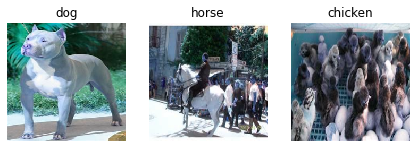

In [52]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(translate[classes[y_test[index]]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()